![Imgur](https://image.freepik.com/free-vector/automobiles-models-icon-collection_74855-5435.jpg)

<a href='https://www.freepik.com/'>models icon @freepik.com </a>


# Exploring Ebay Car Sales Data 

## Introduction

In this guided project, we'll work with a dataset of used cars from eBay Kleinanzeigen, a classifieds section of the German eBay website.

The dataset was originally scraped and uploaded to Kaggle by user orgesleka, the original dataset isn't available on Kaggle anymore, but you can find it [here](https://data.world/data-society/used-cars-data).

This is the sort version, 50000 rows.  

The aim of this project is **to clean the data** and analyze the included used car listings 


### Data dictionary:

- `dateCrawled` - When this ad was first crawled. All field-values are taken from this date.


- `name` - Name of the car.


- `seller` - Whether the seller is private or a dealer.


- `offerType` - The type of listing


- `price` - The price on the ad to sell the car.


- `abtest` - Whether the listing is included in an A/B test.


- `vehicleType` - The vehicle Type.


- `yearOfRegistration` - The year in which the car was first registered.


- `gearbox` - The transmission type.


- `powerPS` - The power of the car in PS.


- `model` - The car model name.


- `kilometer` - How many kilometers the car has driven.


- `monthOfRegistration` - The month in which the car was first registered.


- `fuelType` - What type of fuel the car uses.


- `brand` - The brand of the car.


- `notRepairedDamage`- If the car has a damage which is not yet repaired.


- `dateCreated` - The date on which the eBay listing was created.


- `nrOfPictures` - The number of pictures in the ad.


- `postalCode` - The postal code for the location of the vehicle.


- `lastSeenOnline` - When the crawler saw this ad last online.





### 1. Loading Data

- #### 1.1 Checking file

- #### 1.2. Basic Exploration Data

- #### 1.3 Cleaning column names

- #### 1.3. Initial Exploration Data and cleaning

- #### 1.4. Columns to be droped

### 2. Numeric data stored as text that needs to be cleaned

- #### 2.1 Character deletion and integer conversion

### 3 . What does our dataset look like?

- #### 3.1 Exploring the odometer_km

- #### 3.2 Exploring the price_in_dollar

 - #### 3.2.1 Upper limit `price_in_dollars` detecting outlyers
 
 - ##### 3.2.2 Exploring price outliers on the top of the list:
 
 - #### 3.2.3 Exploring price outliers on the botton of the list
 
 - #### 3.3 The importance of a specific strip on our data set.

### 4. The date columns 

- #### 4.1 Text to datetime format 

 - #### 4.1.1 Distribution of values in series

 - #### 4.1.2 Upper and lower limit registration_year
 
### 5. Price by Brand

- #### 5.1 Average price per vehicle brand

- #### 5.2 Average number of kilometers per vehicle brand

- #### 5.3 List of car brands by average price and average mileage

### 6. Storing Aggregate Data in a DataFrame

- #### 6.1 Identify categorical data

- #### 6.2 Finding the most common brand/model combi

- #### 6.2.1 Dividing the odometer in groups
 
### 7. How much cheaper are damaged cars than their undamaged counterparts?

### 8. Conclusions

* * *

## 1. Loading Data

In [1]:
import numpy as np
import pandas as pd
import chardet # Character encoding auto-detection in Python
import matplotlib.pyplot as plt
%matplotlib inline

### 1.1 Checking file

In [2]:
! file -k csv/autos.csv

csv/autos.csv: CSV text\012- , Non-ISO extended-ASCII text


In [3]:
! file -i csv/autos.csv

csv/autos.csv: application/csv; charset=unknown-8bit


In [4]:
with open("csv/autos.csv", 'rb') as file:
    print(chardet.detect(file.read()))

{'encoding': 'Windows-1252', 'confidence': 0.73, 'language': ''}


In [5]:
autos = pd.read_csv("csv/autos.csv",encoding='Windows-1252') # Windows-1252 == ISO-8859-1

 https://stackoverflow.com/questions/7048745/what-is-the-difference-between-utf-8-and-iso-8859-1
 
 
- ASCII: 7 bits. 128 code points.

- ISO-8859-1: 8 bits. 256 code points.

- UTF-8: 8-32 bits (1-4 bytes). 1,112,064 code points.

Both ISO-8859-1 and UTF-8 are backwards compatible with ASCII, but UTF-8 is not backwards compatible with ISO-8859-1:


### 1.2 Basic Exploration Data

In [6]:
autos.head(3)

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,odometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37


In [7]:
autos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   dateCrawled          50000 non-null  object
 1   name                 50000 non-null  object
 2   seller               50000 non-null  object
 3   offerType            50000 non-null  object
 4   price                50000 non-null  object
 5   abtest               50000 non-null  object
 6   vehicleType          44905 non-null  object
 7   yearOfRegistration   50000 non-null  int64 
 8   gearbox              47320 non-null  object
 9   powerPS              50000 non-null  int64 
 10  model                47242 non-null  object
 11  odometer             50000 non-null  object
 12  monthOfRegistration  50000 non-null  int64 
 13  fuelType             45518 non-null  object
 14  brand                50000 non-null  object
 15  notRepairedDamage    40171 non-null  object
 16  date

### Observations

- There's a max numbers of 50000 rows with 20 columns, there are rows that are complete and others that are not, some columns are missing data.


- Column's name is not properly writed, so we need to [lowerCamelCase](https://en.wikipedia.org/wiki/Camel_case) it.


- Some columns do not have the appropriate data type.


- Some columns have null values, but none have more than ~20% null values.

### 1.3 Cleaning column names

The column names use [camelcase](https://en.wikipedia.org/wiki/Camel_case) instead of Python's preferred [snakecase](https://en.wikipedia.org/wiki/Snake_case), which means we can't just replace spaces with underscores.

Working on fixing the column names:

   - `yearOfRegistration`  to `registration_year`
   - `monthOfRegistration` to `registration_month`
   - `notRepairedDamage`   to `unrepaired_damagè`
   - `dateCreated`         to `ad_created`

In [8]:
column_name = autos.columns
column_name

Index(['dateCrawled', 'name', 'seller', 'offerType', 'price', 'abtest',
       'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model',
       'odometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'dateCreated', 'nrOfPictures', 'postalCode',
       'lastSeen'],
      dtype='object')

In [9]:
autos.rename({'yearOfRegistration':'registration_year',
              'monthOfRegistration':'registration_month',
             'notRepairedDamage':'unrepaired_damage',
              'dateCreated':'ad_created',
              'nrOfPictures':'nr_pictures',
              'dateCrawled':'date_crawled',
              'price':'price_in_dollars',
              'offerType':'offer_type',
              'vehicleType':'vehicle_type',
              'powerPS':'CV',
              'fuelType':'fuel_type'
              ,'postalCode':'postal_code',
              'lastSeen':'last_seen',},
             axis = 1, inplace = True)

Renaming names on snake format, and **powerPS** are converted to **CV** (Cavalli Vapore) means 'Horse Power' in metric system, system used in Europe where the dataframe comes (Germany)

based on this [link](https://www.autoweek.com/news/technology/a1820831/what-ps-metric-horsepower-autoweek-explains/)

### 1.4 Initial Exploration Data and cleaning

Cleaning tasks need to be done: 


- 1. Text columns where all or almost all values are the same. These can often **be dropped as they don't have useful** information for analysis.


- 2. Examples of numeric **data stored as text which can be cleaned and converted**.

In [10]:
column_name

Index(['dateCrawled', 'name', 'seller', 'offerType', 'price', 'abtest',
       'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model',
       'odometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'dateCreated', 'nrOfPictures', 'postalCode',
       'lastSeen'],
      dtype='object')

### 1.4 Columns to be droped:

As we can see by the low relevance of the content it is appropriate to delete the following columns:

- `seller`
- `offer_type`
- `abtest`
- `nr_pictures`
- `postal_code`

<br>

**Check:**

In [11]:
autos['seller'].unique()

array(['privat', 'gewerblich'], dtype=object)

In [12]:
autos['offer_type'].unique() # Angebot = Offer / Gesuch = Request

array(['Angebot', 'Gesuch'], dtype=object)

In [13]:
autos['abtest'].value_counts()

test       25756
control    24244
Name: abtest, dtype: int64

In [14]:
autos['nr_pictures'].value_counts()

0    50000
Name: nr_pictures, dtype: int64

In [15]:
autos['postal_code'].unique()[:10]

array([79588, 71034, 35394, 33729, 39218, 22962, 31535, 53474,  7426,
       15749])

- indeed, we can do without these columns.

In [16]:
columns_todrop = ['seller','offer_type','abtest','nr_pictures','postal_code']

for i in columns_todrop:
    autos.drop([i], axis=1, inplace=True)

In [17]:
len(autos.columns) # number columns after

15

In [18]:
autos.head(0)

,date_crawled,name,price_in_dollars,vehicle_type,registration_year,gearbox,CV,model,odometer,registration_month,fuel_type,brand,unrepaired_damage,ad_created,last_seen


## 2. Cleaning Data 

Numeric data stored as text that needs to be cleaned and converted

A quick look at **all the text-type** columns to determine which ones should be cleaned and changed the data type.

In [19]:
for index in autos.columns:
    condition = autos[index].dtype
    if  condition == 'object':
        print("\n" )
        print(autos[index][0:2])



0    2016-03-26 17:47:46
1    2016-04-04 13:38:56
Name: date_crawled, dtype: object


0              Peugeot_807_160_NAVTECH_ON_BOARD
1    BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik
Name: name, dtype: object


0    $5,000
1    $8,500
Name: price_in_dollars, dtype: object


0          bus
1    limousine
Name: vehicle_type, dtype: object


0      manuell
1    automatik
Name: gearbox, dtype: object


0    andere
1       7er
Name: model, dtype: object


0    150,000km
1    150,000km
Name: odometer, dtype: object


0       lpg
1    benzin
Name: fuel_type, dtype: object


0    peugeot
1        bmw
Name: brand, dtype: object


0    nein
1    nein
Name: unrepaired_damage, dtype: object


0    2016-03-26 00:00:00
1    2016-04-04 00:00:00
Name: ad_created, dtype: object


0    2016-04-06 06:45:54
1    2016-04-06 14:45:08
Name: last_seen, dtype: object


In [20]:
%%html
<style>
table {float:left}
</style>

|text column names|to clean|
|:---|:---|
|date_crawled|datetime|
|name|**ok**|
|price_in_dollars|clean $ sign, to number|
|vehicle_type|**ok**|
|gearbox|**ok**|
|mmodel|**ok**|
|odometer|clean km, to number and rename column to odometer_km|
|fuel_type|**ok**|
|brand|**ok**|
|unrepaired_damage|**ok**|
|ad_created|**ok**|

### 2.1 Character deletion and integer conversion

Let's only modify the columns price in dollars and odometer

In [21]:
autos['price_in_dollars'] = autos['price_in_dollars'].str.replace('$', '')
autos['price_in_dollars'] = autos['price_in_dollars'].str.replace(',', '')
autos['price_in_dollars'] = autos['price_in_dollars'].astype(int)
autos['price_in_dollars']

<ipython-input-21-3355a58c55f7>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  autos['price_in_dollars'] = autos['price_in_dollars'].str.replace('$', '')


0         5000
1         8500
2         8990
3         4350
4         1350
         ...  
49995    24900
49996     1980
49997    13200
49998    22900
49999     1250
Name: price_in_dollars, Length: 50000, dtype: int64

In [22]:
autos.rename({'odometer':'odometer_km'}, axis = 1, inplace = True)
autos['odometer_km'] = autos['odometer_km'].str.replace(',','')
autos['odometer_km'] = autos['odometer_km'].str.replace('km','')
autos['odometer_km'] = autos['odometer_km'].astype(int)
autos['odometer_km']

0        150000
1        150000
2         70000
3         70000
4        150000
          ...  
49995    100000
49996    150000
49997      5000
49998     40000
49999    150000
Name: odometer_km, Length: 50000, dtype: int64

## 3. What does our dataset look like?

In [23]:
autos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   date_crawled        50000 non-null  object
 1   name                50000 non-null  object
 2   price_in_dollars    50000 non-null  int64 
 3   vehicle_type        44905 non-null  object
 4   registration_year   50000 non-null  int64 
 5   gearbox             47320 non-null  object
 6   CV                  50000 non-null  int64 
 7   model               47242 non-null  object
 8   odometer_km         50000 non-null  int64 
 9   registration_month  50000 non-null  int64 
 10  fuel_type           45518 non-null  object
 11  brand               50000 non-null  object
 12  unrepaired_damage   40171 non-null  object
 13  ad_created          50000 non-null  object
 14  last_seen           50000 non-null  object
dtypes: int64(5), object(10)
memory usage: 5.7+ MB


The data is cleaned, the next step is to understand the data, for this we will start with the mileage of the vehicles in the data set.


### 3.1 Exploring the `odometer_km`

In [24]:
autos['odometer_km'].unique()

array([150000,  70000,  50000,  80000,  10000,  30000, 125000,  90000,
        20000,  60000,   5000, 100000,  40000])

In [25]:
autos['odometer_km'].unique().shape

(13,)

In [26]:
autos['odometer_km'].value_counts().sort_index(ascending = False)

150000    32424
125000     5170
100000     2169
90000      1757
80000      1436
70000      1230
60000      1164
50000      1027
40000       819
30000       789
20000       784
10000       264
5000        967
Name: odometer_km, dtype: int64

#### Upper limit `odometer_km`

In [27]:
autos['odometer_km'].value_counts().sort_index(ascending = False).head(5)

150000    32424
125000     5170
100000     2169
90000      1757
80000      1436
Name: odometer_km, dtype: int64

#### Lower limit `odometer_km`

In [28]:
autos['odometer_km'].value_counts().sort_index(ascending = True).head(5)

5000     967
10000    264
20000    784
30000    789
40000    819
Name: odometer_km, dtype: int64

In [29]:
autos["odometer_km"].describe().round()

count     50000.0
mean     125733.0
std       40042.0
min        5000.0
25%      125000.0
50%      150000.0
75%      150000.0
max      150000.0
Name: odometer_km, dtype: float64

There do not appear to be outliers in this column `odometer_km`

### 3.2 Exploring the `price_in_dollar`

In [30]:
autos['price_in_dollars'].unique().shape

(2357,)

###  3.2.1 Upper limit `price_in_dollars` detecting outlyers

In [31]:
autos['price_in_dollars'].value_counts().sort_index(ascending = False).head(15)

99999999    1
27322222    1
12345678    3
11111111    2
10000000    1
3890000     1
1300000     1
1234566     1
999999      2
999990      1
350000      1
345000      1
299000      1
295000      1
265000      1
Name: price_in_dollars, dtype: int64

Let's see to which vehicle if the lowest value value of **265000** $ is a certain value. 

In the event that this price is consistent with the vehicle, we can take it as a reference.

In [32]:
autos[autos["price_in_dollars"] == 265000]

,date_crawled,name,price_in_dollars,vehicle_type,registration_year,gearbox,CV,model,odometer_km,registration_month,fuel_type,brand,unrepaired_damage,ad_created,last_seen
12682,2016-03-28 22:48:01,Porsche_GT3_RS__PCCB__Lift___grosser_Exklusiv_...,265000,coupe,2016,automatik,500,911,5000,3,benzin,porsche,nein,2016-03-28 00:00:00,2016-04-05 03:44:51


It makes sense, so we will use our comparison from this value upwards and see what we find.

https://www.carindigo.com/used-cars/porsche-911-gt3-rs

<br>

As there are not too many values to check, it seems sensible to start from this model and see what we can eliminate and what we cannot.

Let's see which vehicles are above this one, **creating a new dataset variable** `top_list` to work with.

In [33]:
top_list = autos[(autos["price_in_dollars"] >= 265000)].sort_index(ascending = False)

In [34]:
top_list[["price_in_dollars","brand","model","vehicle_type"]].sort_index(ascending = False)

,price_in_dollars,brand,model,vehicle_type
47634,3890000,sonstige_autos,NaN,coupe
47598,12345678,opel,vectra,limousine
43049,999999,volkswagen,transporter,bus
42221,27322222,citroen,c4,limousine
39705,99999999,mercedes_benz,s_klasse,limousine
39377,12345678,volvo,v40,NaN
37585,999990,volkswagen,jetta,limousine
36818,350000,porsche,911,coupe
35923,295000,porsche,911,cabrio
34723,299000,porsche,911,coupe


### 3.2.1.1 Exploring price outliers on the top of the list:

<br>

There are vehicles that make sense to be on this list and that others clearly do not, for example: 

Strange values of 1234566, corresponding to a **BMW** or 11111111 to a **Volkswagen** even a ç**Citroen C4** that is worth 27322222. 

Clearly, these cases could be eliminated as error.

However, there are some kind of vehicles called **'sonstige autos'** (mean **other cars in German**) that we are not aware of and because they have an important weight in the list it is important to clarify whether or not we should eliminate them.  

In [35]:
top_list[top_list["brand"] == "sonstige_autos"]

,date_crawled,name,price_in_dollars,vehicle_type,registration_year,gearbox,CV,model,odometer_km,registration_month,fuel_type,brand,unrepaired_damage,ad_created,last_seen
47634,2016-04-04 21:25:21,Ferrari_FXX,3890000,coupe,2006,NaN,799,NaN,5000,7,NaN,sonstige_autos,nein,2016-04-04 00:00:00,2016-04-05 12:07:37
14715,2016-03-30 08:37:24,Rolls_Royce_Phantom_Drophead_Coupe,345000,cabrio,2012,automatik,460,NaN,20000,8,benzin,sonstige_autos,nein,2016-03-30 00:00:00,2016-04-07 00:16:26
11137,2016-03-29 23:52:57,suche_maserati_3200_gt_Zustand_unwichtig_laufe...,10000000,coupe,1960,manuell,368,NaN,100000,1,benzin,sonstige_autos,nein,2016-03-29 00:00:00,2016-04-06 21:18:11
7814,2016-04-04 11:53:31,Ferrari_F40,1300000,coupe,1992,NaN,0,NaN,50000,12,NaN,sonstige_autos,nein,2016-04-04 00:00:00,2016-04-05 11:34:11


### let's check if these prices correspond to reality

| name | price in Dollars |registration_year | source |
| :--- | :----------- |:------ | :--- |
| Ferrari_FXX | 4,000,000| 2006 |https://www.autoblog.com/2006/06/14/for-sale-2006-ferrari-fxx-slightly-used/?guccounter=1 |
| Rolls_Royce_Phantom_Drophead_Coupe | From 450,000 | 2012 | https://www.cars.com/shopping/rolls_royce-phantom_drophead_coupe-2012/ |
|Ferrari_F40| 1,959,900 |1992 | https://www.dupontregistry.com/autos/listing/1992/ferrari/f40/2418434 |
|Maserati 3200 GT|  | |  **Note** | 

**Note**: In relation to the Maserati, there are several things to consider.


- The [3200 Gt](https://es.wikipedia.org/wiki/Maserati_3200_GT) model was in production during the period 1998 to 2001 so the registration date we have from 1960 does not match, however, during the period 1957 - 1964 only one model of this brand was produced, the  [3500 Gt](https://en.wikipedia.org/wiki/Maserati_3500_GT#:~:text=The%20Maserati%203500%20GT%20(Tipo,Maserati%20between%201957%20and%201964.), only 2,222 units were produced between the Coupe and the Spider version.

- If we also take into account the description referred to in the cell of the name:

     ***" Zustand_unwichtig_laufe... // Condition_unimportant_running..."***


- The person who placed the advert was looking for a masserati in any condition (just running or not...), this gives us a clue that the model we are talking about is not the newest one, so probably refers to the 60's model.

- As if this were not enough the price we have is 10 000 000 dollars and surely this is wrong because doing a search of what is the value of the car [I have found that this ranges between 863.170,50 USD / 151.290,57 USD](https://www.el-parking.es/coches-usados/maserati-3500-gt.html#!/coches-usados/maserati-3500-gt.html%3Ftri%3Dprix_decroissant)

Therefore, the best thing I can think of is assign the <strong>'average between prices'</strong> to our vehicle.


In [36]:
autos.iloc[11137,:]

date_crawled                                        2016-03-29 23:52:57
name                  suche_maserati_3200_gt_Zustand_unwichtig_laufe...
price_in_dollars                                               10000000
vehicle_type                                                      coupe
registration_year                                                  1960
gearbox                                                         manuell
CV                                                                  368
model                                                               NaN
odometer_km                                                      100000
registration_month                                                    1
fuel_type                                                        benzin
brand                                                    sonstige_autos
unrepaired_damage                                                  nein
ad_created                                          2016-03-29 0

Change the **'average between prices'** price of the Masserati = 507230$

In [37]:
autos.iloc[11137,4] = 507230

### removing rows from top list

#### So... what do we have to remove from this top list?

Everything other than 

If **'Sonstige_autos'** and **'Porsche'** remain, we will eliminate the others that are the ones that do not interest us

In [38]:
removed_bad_price_bool = ((top_list["brand"] != 'sonstige_autos') & (top_list["brand"] != 'porsche'))

These are the rows that we must eliminate

In [39]:
bad_cars = top_list[removed_bad_price_bool]
bad_cars

,date_crawled,name,price_in_dollars,vehicle_type,registration_year,gearbox,CV,model,odometer_km,registration_month,fuel_type,brand,unrepaired_damage,ad_created,last_seen
47598,2016-03-31 18:56:54,Opel_Vectra_B_1_6i_16V_Facelift_Tuning_Showcar...,12345678,limousine,2001,manuell,101,vectra,150000,3,benzin,opel,nein,2016-03-31 00:00:00,2016-03-31 18:56:54
43049,2016-03-21 19:53:52,2_VW_Busse_T3,999999,bus,1981,manuell,70,transporter,150000,1,benzin,volkswagen,NaN,2016-03-21 00:00:00,2016-03-28 17:18:28
42221,2016-03-08 20:39:05,Leasinguebernahme,27322222,limousine,2014,manuell,163,c4,40000,2,diesel,citroen,NaN,2016-03-08 00:00:00,2016-03-08 20:39:05
39705,2016-03-22 14:58:27,Tausch_gegen_gleichwertiges,99999999,limousine,1999,automatik,224,s_klasse,150000,9,benzin,mercedes_benz,NaN,2016-03-22 00:00:00,2016-04-06 05:15:30
39377,2016-03-08 23:53:51,Tausche_volvo_v40_gegen_van,12345678,NaN,2018,manuell,95,v40,150000,6,NaN,volvo,nein,2016-03-08 00:00:00,2016-04-06 23:17:31
37585,2016-03-29 11:38:54,Volkswagen_Jetta_GT,999990,limousine,1985,manuell,111,jetta,150000,12,benzin,volkswagen,ja,2016-03-29 00:00:00,2016-03-29 11:38:54
27371,2016-03-09 15:45:47,Fiat_Punto,12345678,NaN,2017,NaN,95,punto,150000,0,NaN,fiat,NaN,2016-03-09 00:00:00,2016-03-09 15:45:47
24384,2016-03-21 13:57:51,Schlachte_Golf_3_gt_tdi,11111111,NaN,1995,NaN,0,NaN,150000,0,NaN,volkswagen,NaN,2016-03-21 00:00:00,2016-03-21 14:40:18
22947,2016-03-22 12:54:19,Bmw_530d_zum_ausschlachten,1234566,kombi,1999,automatik,190,NaN,150000,2,diesel,bmw,NaN,2016-03-22 00:00:00,2016-04-02 03:17:32
2897,2016-03-12 21:50:57,Escort_MK_1_Hundeknochen_zum_umbauen_auf_RS_2000,11111111,limousine,1973,manuell,48,escort,50000,3,benzin,ford,nein,2016-03-12 00:00:00,2016-03-12 22:45:27


#### Running the index of each row we eliminate the vehicles from the main dataset `autos`

In [40]:
for bad in bad_cars.index:
    autos.drop([bad], inplace = True)

###  3.2.3 Exploring price outliers on the botton of the list:

In [41]:
autos["price_in_dollars"].describe().round()

count       49989.0
mean         6025.0
std         49134.0
min             0.0
25%          1100.0
50%          2950.0
75%          7200.0
max      10000000.0
Name: price_in_dollars, dtype: float64

### 3.3 The importance of a specific strip on our data set.

#### The minimum value is 0 and we do not reach 25% of the total dataset the price does not reach 1100€.

Let's see if prices vary a lot or if they are very spread out within this range (25%). 

In [42]:
autos[autos['price_in_dollars'].between(0,1100)].describe()

,price_in_dollars,registration_year,CV,odometer_km,registration_month
count,12538.000000,12538.000000,12538.000000,12538.000000,12538.000000
mean,556.422396,2002.788563,74.677461,136162.466103,4.831552
std,339.147087,146.343951,174.629327,34988.383373,3.947714
min,0.000000,1111.000000,0.000000,5000.000000,0.000000
25%,300.000000,1996.000000,45.000000,150000.000000,1.000000
50%,599.000000,1999.000000,71.000000,150000.000000,4.000000
75%,850.000000,2001.000000,101.000000,150000.000000,8.000000
max,1100.000000,9999.000000,15016.000000,150000.000000,12.000000


if i want to the total sum of the price of these vehicles **in different price ranges**

i.e. how much 75 of the 25 of the total.

In [43]:
seventy_five = autos[autos['price_in_dollars'].between(850,1100)] #75% of the total 25%
seventy_five.loc[:,'price_in_dollars'].sum()

3227534

In [44]:
fifty_percent = autos[autos['price_in_dollars'].between(599,850)] #50% of the total 25%
fifty_percent.loc[:,'price_in_dollars'].sum()

2462601

In [45]:
cuart = autos[autos['price_in_dollars'].between(300,599)] #25% of the total 25%
cuart.loc[:,'price_in_dollars'].sum()

1431649

In this way the importance in the overall data set can be compared.


| price ranges | price in Dollars | percentage over total |
| :---          | :-----  | :-----      | 
| [850 ~  1100] | 3227534 | 1,095478069 % |
| [599 ~ 850]   | 2462601 | 0,835847241 % |
| [300 ~ 599]   | 1431649 | 0,485925193 % |

It seems that it is not too relevant, so in order to take advantage of the maximum amount of information I will take into account a range that goes from the maximum that we have already defined before to **850 €.**

Once we have the properlly data at the top and at the bottom, we make a clean copy of our dataframe and call it:

- `auto_clean`

In [46]:
auto_clean = autos[autos['price_in_dollars'].between(850,10000000)].copy()

In [47]:
auto_clean['price_in_dollars'].describe().round()

count       40786.0
mean         7293.0
std         54315.0
min           850.0
25%          1950.0
50%          3999.0
75%          8500.0
max      10000000.0
Name: price_in_dollars, dtype: float64

## 4. Date columns

These are the four columns that represent dates:

- `date_crawled`

- `ad_created`

- `last_seen`

- `registration_year`

In [48]:
auto_clean['registration_year'].dtype

dtype('int64')

In [49]:
auto_clean['date_crawled'].dtype

dtype('O')

Columns with with two different types of data, numerical and type = ('O')

The first character specifies the kind of data and the remaining characters specify the number of bytes per item, except for Unicode, where it is interpreted as the number of characters. 

The item size must correspond to an existing type, or an error will be raised. The supported kinds are to an existing type, or an error will be raised. The supported kinds are:

|dtype|type|
|:--|:--|
|'b'       |boolean|
|'i'       |(signed) integer|
|'u'       |unsigned integer|
|'f'       |floating-point|
|'c'       |complex-floating point|
|**'O'**       |**(Python) objects**|
|'S', 'a'  |(byte-)string|
|'U'       |Unicode|
|'V'       |raw data (void)|

Objects of this type are usually of type text strings.

https://docs.scipy.org/doc/numpy-1.10.1/reference/arrays.dtypes.html

In [50]:
auto_clean[['date_crawled','ad_created','last_seen']].describe() # type text

,date_crawled,ad_created,last_seen
count,40786,40786,40786
unique,39611,76,32824
top,2016-03-08 10:40:35,2016-04-03 00:00:00,2016-04-07 06:17:27
freq,3,1608,7


### 4.1 Text to datetime format

We need to convert the data text into a in a time format so we can understand it quantitatively, and understand the distribution.

In [51]:
replace_columns = ['date_crawled', 'ad_created', 'last_seen']

for column in replace_columns:
    auto_clean[column] = auto_clean[column].str[:10]
    auto_clean[column] = auto_clean[column].str.replace('-','')
    auto_clean[column] = auto_clean[column].astype(int)
    #auto_clean[column] = auto_clean[column].value_counts(normalize=True, dropna=False)
    
auto_clean[['date_crawled','ad_created','last_seen','registration_year']].describe()

,date_crawled,ad_created,last_seen,registration_year
count,4.078600e+04,4.078600e+04,4.078600e+04,40786.000000
mean,2.016033e+07,2.016033e+07,2.016037e+07,2017.778184
std,3.209942e+01,1.180212e+02,4.190067e+01,2503.086461
min,2.016030e+07,2.015061e+07,2.016030e+07,1000.000000
25%,2.016031e+07,2.016031e+07,2.016032e+07,2000.000000
50%,2.016032e+07,2.016032e+07,2.016040e+07,2005.000000
75%,2.016033e+07,2.016033e+07,2.016041e+07,2009.000000
max,2.016041e+07,2.016041e+07,2.016041e+07,507230.000000


The first three columns are the ones that we have just modified give us an unclear information, the reason is that the date format of which we are working includes the month and the day and as pandas sees it as an integer of must appear the engineering notation.

On the other hand, in column registration_year, even if it is of int type, we see that both the minimum value and the maximum value do not correspond to what should be the years of the registration of the vehicles.

we will work with each of the series individually.

### 4.1.1 Distribution of values in the `date_crawled`, `ad_created`, and `last_seen` columns

In [52]:
auto_clean['date_crawled'][2] # content series looks like...

20160326

In [53]:
import datetime as dt

### date_crawled

In [54]:
var_date_crawled = auto_clean['date_crawled']

In [55]:
auto_clean['date_crawled'] = pd.to_datetime(var_date_crawled,format='%Y%m%d')

In [56]:
auto_clean['date_crawled'].describe()

<ipython-input-56-2b991325700b>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  auto_clean['date_crawled'].describe()


count                   40786
unique                     34
top       2016-04-03 00:00:00
freq                     1597
first     2016-03-05 00:00:00
last      2016-04-07 00:00:00
Name: date_crawled, dtype: object

In [57]:
auto_clean['date_crawled'].value_counts(normalize=True, dropna=False)*100

2016-04-03    3.915559
2016-03-20    3.802775
2016-03-21    3.743932
2016-03-12    3.741480
2016-04-04    3.680184
2016-03-14    3.643407
2016-04-02    3.623792
2016-03-07    3.560045
2016-03-28    3.520816
2016-03-19    3.511009
2016-04-01    3.442358
2016-03-29    3.371255
2016-03-15    3.363899
2016-03-30    3.309959
2016-03-10    3.307507
2016-03-26    3.287893
2016-03-22    3.280537
2016-03-08    3.268278
2016-03-11    3.265827
2016-03-09    3.246212
2016-03-23    3.231501
2016-03-27    3.130976
2016-03-31    3.126073
2016-03-17    3.077036
2016-03-25    3.072133
2016-03-16    2.917668
2016-03-24    2.895601
2016-03-05    2.557250
2016-03-13    1.603491
2016-03-06    1.414701
2016-04-05    1.326436
2016-03-18    1.292110
2016-04-06    0.321189
2016-04-07    0.147109
Name: date_crawled, dtype: float64

### ad_created

In [58]:
var_date_crawled = auto_clean['ad_created']

In [59]:
auto_clean['ad_created'] = pd.to_datetime(var_date_crawled,format='%Y%m%d')

In [60]:
auto_clean['ad_created'].describe()

<ipython-input-60-5c928425734b>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  auto_clean['ad_created'].describe()


count                   40786
unique                     76
top       2016-04-03 00:00:00
freq                     1608
first     2015-06-11 00:00:00
last      2016-04-07 00:00:00
Name: ad_created, dtype: object

In [61]:
auto_clean['ad_created'].value_counts(normalize=True, dropna=False)*100

2016-04-03    3.942529
2016-03-20    3.815035
2016-03-21    3.768450
2016-03-12    3.726769
2016-04-04    3.719414
                ...   
2016-02-01    0.002452
2016-01-22    0.002452
2016-01-29    0.002452
2015-11-10    0.002452
2016-02-16    0.002452
Name: ad_created, Length: 76, dtype: float64

### last_seen

In [62]:
var_date_crawled = auto_clean['last_seen']

In [63]:
auto_clean['last_seen'] = pd.to_datetime(var_date_crawled,format='%Y%m%d')

In [64]:
auto_clean['last_seen'].describe()

<ipython-input-64-7ab2b317ab32>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  auto_clean['last_seen'].describe()


count                   40786
unique                     34
top       2016-04-06 00:00:00
freq                     9444
first     2016-03-05 00:00:00
last      2016-04-07 00:00:00
Name: last_seen, dtype: object

In [65]:
auto_clean['last_seen'].value_counts(normalize=True, dropna=False)*100

2016-04-06    23.155004
2016-04-07    13.742461
2016-04-05    12.955426
2016-03-17     2.670034
2016-04-02     2.542539
2016-04-03     2.456725
2016-04-04     2.353749
2016-03-30     2.353749
2016-03-31     2.299809
2016-04-01     2.299809
2016-03-12     2.275291
2016-03-29     2.106115
2016-03-22     2.098759
2016-03-21     2.030108
2016-03-20     1.981072
2016-03-28     1.978620
2016-03-24     1.892806
2016-03-23     1.826607
2016-03-25     1.814348
2016-03-26     1.596136
2016-03-16     1.561810
2016-03-15     1.510322
2016-03-19     1.493159
2016-03-27     1.485804
2016-03-14     1.203844
2016-03-11     1.162163
2016-03-10     1.012602
2016-03-09     0.912078
2016-03-13     0.858138
2016-03-18     0.747806
2016-03-08     0.652185
2016-03-07     0.478105
2016-03-06     0.380032
2016-03-05     0.112784
Name: last_seen, dtype: float64

### 4.1.2 Selecting the upper and lower limit `registration_year`

In the column of when the cars were registered it is convenient to look at the upper and lower limits to determine the time interval in which we are working.

In [66]:
auto_clean['registration_year'].value_counts().sort_index(ascending = False).head(20)

507230       1
9999         2
9000         1
8888         1
6200         1
5911         1
5000         2
4500         1
4100         1
2800         1
2019         1
2018       435
2017      1113
2016       733
2015       362
2014       649
2013       795
2012      1306
2011      1617
2010      1585
Name: registration_year, dtype: int64

In [67]:
auto_clean['registration_year'].value_counts().sort_index(ascending = False).tail(30)

1967    25
1966    21
1965    17
1964     9
1963     8
1962     4
1961     6
1960    18
1959     6
1958     4
1957     2
1956     4
1955     2
1954     2
1953     1
1952     1
1951     2
1950     1
1948     1
1943     1
1941     2
1939     1
1938     1
1937     4
1934     2
1931     1
1929     1
1927     1
1001     1
1000     1
Name: registration_year, dtype: int64

The maximum and minimum dates are wrong.






although in this column we see that there are values until 2018, We see that beyond 2016 the values of the dates do not make sense, however we must remember that the data capture was done in 2016  thats the reason  those dates do not exist we should limit the highest year to 2016.

Any vehicle with a registration year above 2016 is inaccurate. 

Determining the earliest valid year is more difficult. Realistically, it could be somewhere in the first few decades of the 1900s, let's set a time slot between 1959,2016.

Let's count the number of listings with cars that fall outside the 1900 - 2016 interval and see if it's safe to remove those rows entirely, or if we need more custom logic.

In [68]:
years = auto_clean['registration_year'].between(1959,2016)

In [69]:
auto_clean['registration_year'] = auto_clean[years]['registration_year']

In [70]:
auto_clean['registration_year'].value_counts(normalize=True, dropna=False)*100 # % of frecuency

2005.0    6.904330
2006.0    6.521846
2004.0    6.485068
2003.0    6.239886
2000.0    5.572991
2001.0    5.558280
2007.0    5.543569
2002.0    5.536213
2008.0    5.406267
2009.0    5.089982
1999.0    4.925710
2011.0    3.964596
NaN       3.915559
2010.0    3.886137
1998.0    3.758643
2012.0    3.202079
1997.0    2.454274
2013.0    1.949198
2016.0    1.797185
1996.0    1.659883
2014.0    1.591232
1995.0    1.333791
2015.0    0.887559
1994.0    0.806649
1993.0    0.610504
1992.0    0.603148
1991.0    0.559015
1990.0    0.522238
1989.0    0.326092
1988.0    0.284411
1985.0    0.203501
1980.0    0.174079
1986.0    0.139754
1987.0    0.139754
1983.0    0.122591
1984.0    0.117687
1978.0    0.102977
1982.0    0.095621
1970.0    0.080910
1979.0    0.076006
1972.0    0.076006
1981.0    0.066199
1968.0    0.063747
1967.0    0.061296
1974.0    0.058844
1971.0    0.058844
1973.0    0.056392
1966.0    0.051488
1976.0    0.051488
1977.0    0.051488
1975.0    0.044133
1969.0    0.044133
1960.0    0.

### Summary

In [71]:
auto_clean[['date_crawled','ad_created','last_seen']].describe()

<ipython-input-71-cda3796587cf>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  auto_clean[['date_crawled','ad_created','last_seen']].describe()


,date_crawled,ad_created,last_seen
count,40786,40786,40786
unique,34,76,34
top,2016-04-03 00:00:00,2016-04-03 00:00:00,2016-04-06 00:00:00
freq,1597,1608,9444
first,2016-03-05 00:00:00,2015-06-11 00:00:00,2016-03-05 00:00:00
last,2016-04-07 00:00:00,2016-04-07 00:00:00,2016-04-07 00:00:00


Between March and April 2016 there was the highest activity on the site.

In [72]:
auto_clean['registration_year'].describe()

count    39189.000000
mean      2003.763939
std          6.814238
min       1959.000000
25%       2000.000000
50%       2004.000000
75%       2008.000000
max       2016.000000
Name: registration_year, dtype: float64

75% of the vehicles were registered in 2008.

In [73]:
auto_clean['registration_year'].value_counts(normalize=True,
                                             dropna=False, 
                                             bins = 10).sort_index(ascending = False).round(3)*100

(2010.3, 2016.0]      13.4
(2004.6, 2010.3]      33.4
(1998.9, 2004.6]      34.3
(1993.2, 1998.9]      10.0
(1987.5, 1993.2]       2.9
(1981.8, 1987.5]       0.8
(1976.1, 1981.8]       0.5
(1970.4, 1976.1]       0.3
(1964.7, 1970.4]       0.3
(1958.942, 1964.7]     0.1
Name: registration_year, dtype: float64

This is the distribution of the dates of registration by groups of 10, in which we can see how the period between 2002 and 2007 is the one with the highest number of registrations. 

## 5. Price by Brand

Brands with the highest number of vehicles on the sales list

In [74]:
top_ten_brands=auto_clean['brand'].value_counts()
top_ten_brands

volkswagen        8658
bmw               4881
mercedes_benz     4390
opel              3846
audi              3838
ford              2488
renault           1651
peugeot           1135
fiat               920
seat               758
skoda              734
smart              667
mazda              586
citroen            582
nissan             576
toyota             575
hyundai            427
mini               415
sonstige_autos     408
volvo              366
honda              311
kia                309
mitsubishi         292
porsche            279
alfa_romeo         263
chevrolet          261
suzuki             239
chrysler           136
dacia              128
jeep               107
land_rover          99
daihatsu            80
subaru              75
jaguar              70
saab                59
daewoo              45
trabant             38
rover               35
lancia              32
lada                27
Name: brand, dtype: int64

In [75]:
selected_brands=auto_clean['brand'].value_counts().index[:10]
selected_brands

Index(['volkswagen', 'bmw', 'mercedes_benz', 'opel', 'audi', 'ford', 'renault',
       'peugeot', 'fiat', 'seat'],
      dtype='object')

I choose only the 10 first brands

### 5.1 Average price per vehicle brand

In [76]:
brands_price = {}

for brand in selected_brands:
    sel_brand = auto_clean[auto_clean['brand'] == brand ]
    brands_price[brand] = sel_brand['price_in_dollars'].mean().round()

brands_price_sorted = sorted(brands_price.items(),key = lambda kv: kv[1],reverse=True)
brands_price_sorted

[('audi', 9961.0),
 ('mercedes_benz', 9013.0),
 ('bmw', 8887.0),
 ('volkswagen', 6271.0),
 ('seat', 5137.0),
 ('ford', 4905.0),
 ('opel', 3864.0),
 ('peugeot', 3734.0),
 ('fiat', 3664.0),
 ('renault', 3227.0)]

### 5.2 Average number of kilometers per vehicle brand 

In [77]:
brands_km = {}

for brand in sorted(selected_brands):
    sel_brand = auto_clean[auto_clean['brand'] == brand ]
    brands_km[brand] = sel_brand['odometer_km'].mean().round()

brands_km_sorted = sorted(brands_km.items(),key = lambda kv: kv[1], reverse=True)
brands_km_sorted

[('bmw', 132295.0),
 ('mercedes_benz', 130489.0),
 ('audi', 128415.0),
 ('volkswagen', 126803.0),
 ('opel', 125711.0),
 ('peugeot', 123621.0),
 ('renault', 123540.0),
 ('ford', 121481.0),
 ('seat', 119162.0),
 ('fiat', 111332.0)]

### 5.3 List of car brands by average price and average mileage

In [78]:
listado = {}

template_string = "Mean price {money:.2f}$ and {km:.2f} mean Kilometers"

for vehiculo in brands_price:
    mean_price = brands_price[vehiculo]
    mean_km = brands_km[vehiculo]
    output = template_string.format(money = mean_price, km = mean_km )
    listado[vehiculo] = output
    
listado

{'volkswagen': 'Mean price 6271.00$ and 126803.00 mean Kilometers',
 'bmw': 'Mean price 8887.00$ and 132295.00 mean Kilometers',
 'mercedes_benz': 'Mean price 9013.00$ and 130489.00 mean Kilometers',
 'opel': 'Mean price 3864.00$ and 125711.00 mean Kilometers',
 'audi': 'Mean price 9961.00$ and 128415.00 mean Kilometers',
 'ford': 'Mean price 4905.00$ and 121481.00 mean Kilometers',
 'renault': 'Mean price 3227.00$ and 123540.00 mean Kilometers',
 'peugeot': 'Mean price 3734.00$ and 123621.00 mean Kilometers',
 'fiat': 'Mean price 3664.00$ and 111332.00 mean Kilometers',
 'seat': 'Mean price 5137.00$ and 119162.00 mean Kilometers'}

In [79]:
frame = {'brands average price':brands_price,
         'brands average kilometer':brands_km}

output = pd.DataFrame(frame)
output

,brands average price,brands average kilometer
volkswagen,6271.0,126803.0
bmw,8887.0,132295.0
mercedes_benz,9013.0,130489.0
opel,3864.0,125711.0
audi,9961.0,128415.0
ford,4905.0,121481.0
renault,3227.0,123540.0
peugeot,3734.0,123621.0
fiat,3664.0,111332.0
seat,5137.0,119162.0


## 6. Storing Aggregate Data in a DataFrame

In [80]:
brands_price_series = pd.Series(brands_price)

In [81]:
brands_price_series

volkswagen       6271.0
bmw              8887.0
mercedes_benz    9013.0
opel             3864.0
audi             9961.0
ford             4905.0
renault          3227.0
peugeot          3734.0
fiat             3664.0
seat             5137.0
dtype: float64

In [82]:
brands_km_series = pd.Series(brands_km)

In [83]:
brands_km_series

audi             128415.0
bmw              132295.0
fiat             111332.0
ford             121481.0
mercedes_benz    130489.0
opel             125711.0
peugeot          123621.0
renault          123540.0
seat             119162.0
volkswagen       126803.0
dtype: float64

In [84]:
auto_clean['registration_year']

frame = {'mean_price':brands_price_series,
        'mean_kilometers':brands_km_series}

output = pd.DataFrame(frame)
output

,mean_price,mean_kilometers
audi,9961.0,128415.0
bmw,8887.0,132295.0
fiat,3664.0,111332.0
ford,4905.0,121481.0
mercedes_benz,9013.0,130489.0
opel,3864.0,125711.0
peugeot,3734.0,123621.0
renault,3227.0,123540.0
seat,5137.0,119162.0
volkswagen,6271.0,126803.0


List of car brands by highest price, their average price and average mileage.

### 6.1 Identify categorical data

Using German words, translate them and map the values to their equivalents, in this case to Spanish, because there are categories that are unknown here. 

In [85]:
 auto_clean['vehicle_type'].value_counts(dropna = False)

limousine     11059
kombi          7892
kleinwagen     7613
bus            3797
NaN            3042
cabrio         2893
coupe          2244
suv            1937
andere          309
Name: vehicle_type, dtype: int64

In [86]:
auto_clean['vehicle_type'].value_counts().dropna()

limousine     11059
kombi          7892
kleinwagen     7613
bus            3797
cabrio         2893
coupe          2244
suv            1937
andere          309
Name: vehicle_type, dtype: int64

In [87]:
categorical_vehicle_type = auto_clean['vehicle_type'].value_counts().dropna().index[:]

In [88]:
category_translator = {'bus':'monovolumen','limousine':'sedan', 'kleinwagen':'compacto','kombi':'familiar',
                       'coupe':'coupe','suv':'suv','cabrio':'cabrio','andere':'otros'}

for category in categorical_vehicle_type:
    bool_category = auto_clean['vehicle_type'] == category
    auto_clean.loc[bool_category,'vehicle_type'] = category_translator[category]

In [89]:
auto_clean['vehicle_type'].value_counts()

sedan          11059
familiar        7892
compacto        7613
monovolumen     3797
cabrio          2893
coupe           2244
suv             1937
otros            309
Name: vehicle_type, dtype: int64

In [90]:
categorical_type_fuel = auto_clean['fuel_type'].value_counts().index[:]
categorical_type_fuel.value_counts()

benzin     1
diesel     1
lpg        1
cng        1
hybrid     1
elektro    1
andere     1
dtype: int64

In [91]:
categorical_type_fuel_translator = {'benzin':'gasolina', 'diesel':'diesel', 'lpg':'lpg', 'cng':'cng',
                                    'hybrid':'híbrido', 'elektro':'electrico', 'andere':'otros'}

for category in categorical_type_fuel:
    bool_fuel = auto_clean['fuel_type'] == category
    auto_clean.loc[bool_fuel,'fuel_type'] = categorical_type_fuel_translator[category]

In [92]:
auto_clean['fuel_type'].value_counts()

gasolina     23572
diesel       13878
lpg            605
cng             64
híbrido         37
electrico       17
otros           13
Name: fuel_type, dtype: int64

In [93]:
condicion_1 = auto_clean['fuel_type'] == 'híbrido' # testing hybrid category
auto_clean[condicion_1].head(3) # checking

,date_crawled,name,price_in_dollars,vehicle_type,registration_year,gearbox,CV,model,odometer_km,registration_month,fuel_type,brand,unrepaired_damage,ad_created,last_seen
1127,2016-03-10,Toyota_Auris_1.8_Hybrid_Executive,9850,sedan,2010.0,automatik,136,auris,100000,9,híbrido,toyota,nein,2016-03-10,2016-04-05
1710,2016-03-31,Toyota_Yaris_Hybrid_1.5_VVT_i_Club_Panorama__A...,14900,compacto,2014.0,automatik,75,yaris,20000,5,híbrido,toyota,nein,2016-03-31,2016-04-06
2062,2016-03-18,Toyota_Auris_1.8_VVT_i_Hybrid_Automatik_Tourin...,19500,familiar,2014.0,automatik,99,auris,50000,4,híbrido,toyota,nein,2016-03-18,2016-04-03


In [94]:
auto_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40786 entries, 0 to 49999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   date_crawled        40786 non-null  datetime64[ns]
 1   name                40786 non-null  object        
 2   price_in_dollars    40786 non-null  int64         
 3   vehicle_type        37744 non-null  object        
 4   registration_year   39189 non-null  float64       
 5   gearbox             39234 non-null  object        
 6   CV                  40786 non-null  int64         
 7   model               39044 non-null  object        
 8   odometer_km         40786 non-null  int64         
 9   registration_month  40786 non-null  int64         
 10  fuel_type           38186 non-null  object        
 11  brand               40786 non-null  object        
 12  unrepaired_damage   34483 non-null  object        
 13  ad_created          40786 non-null  datetime64

In [95]:
all_brands= auto_clean['brand'].unique()
sorted(all_brands)

['alfa_romeo',
 'audi',
 'bmw',
 'chevrolet',
 'chrysler',
 'citroen',
 'dacia',
 'daewoo',
 'daihatsu',
 'fiat',
 'ford',
 'honda',
 'hyundai',
 'jaguar',
 'jeep',
 'kia',
 'lada',
 'lancia',
 'land_rover',
 'mazda',
 'mercedes_benz',
 'mini',
 'mitsubishi',
 'nissan',
 'opel',
 'peugeot',
 'porsche',
 'renault',
 'rover',
 'saab',
 'seat',
 'skoda',
 'smart',
 'sonstige_autos',
 'subaru',
 'suzuki',
 'toyota',
 'trabant',
 'volkswagen',
 'volvo']

### 6.2 Finding the most common brand/model combi.

The top three brands on our list also have their own favourite models, as can be seen below.

In [96]:
def modelos_brand(marca):
    bool_marca = auto_clean['brand'] == marca                              # boolean filter by brand
    print(auto_clean.loc[bool_marca,'model'].value_counts()[:5])           # top five model brand 

In [97]:
modelos_brand('alfa_romeo')

147       73
156       62
andere    51
159       33
spider    32
Name: model, dtype: int64


In [98]:
modelos_brand('mercedes_benz')

c_klasse    1088
e_klasse     929
a_klasse     511
andere       426
clk          240
Name: model, dtype: int64


In [99]:
modelos_brand('bmw')

3er        2408
5er        1100
1er         525
x_reihe     302
7er         127
Name: model, dtype: int64


In [100]:
def top_model(marca):
    boolean_filter = auto_clean['brand'] == marca
    if auto_clean.loc[boolean_filter,'model'].value_counts().index[0] == 'andere':
        return auto_clean.loc[boolean_filter,'model'].value_counts().index[1]
    else:
        return auto_clean.loc[boolean_filter,'model'].value_counts().index[0]

Model within each brand that is repeated more times within our data set, the order is given by the brand of the vehicle.

In [101]:
bool_fiat = auto_clean['brand'] == 'alfa_romeo'

In [102]:
x = auto_clean.loc[bool_fiat,'model']
x.value_counts().index[0:1]

Index(['147'], dtype='object')

In [103]:
top_model('bmw')

'3er'

In [104]:
marc_modelo = {}

for brand in sorted(all_brands):
    try:
        marc_modelo[brand] = top_model(brand)
    except:
        print(brand,"doesnt have model")

marc_modelo = pd.Series(marc_modelo)
marc_modelo

sonstige_autos doesnt have model


alfa_romeo              147
audi                     a4
bmw                     3er
chevrolet             matiz
chrysler          ptcruiser
citroen            berlingo
dacia               sandero
daewoo                kalos
daihatsu              cuore
fiat                  punto
ford                  focus
honda                 civic
hyundai             i_reihe
jaguar               x_type
jeep                  grand
kia                 sorento
lada                   niva
lancia              ypsilon
land_rover       freelander
mazda               6_reihe
mercedes_benz      c_klasse
mini                 cooper
mitsubishi             colt
nissan                micra
opel                  astra
peugeot             2_reihe
porsche                 911
renault              twingo
rover            freelander
saab                    900
seat                  ibiza
skoda               octavia
smart                fortwo
subaru              impreza
suzuki                swift
toyota              

### 6.2.1 Odometer in groups 

Use aggregation to see if the prices follow any pattern in mileage.

In [105]:
km_group = auto_clean['odometer_km'].value_counts()
km_group

150000    25074
125000     4535
100000     1923
90000      1609
80000      1357
70000      1169
60000      1108
50000       990
40000       799
30000       750
20000       706
5000        535
10000       231
Name: odometer_km, dtype: int64

In [106]:
km_group = auto_clean['odometer_km'].value_counts().index[:]
km_group

Int64Index([150000, 125000, 100000,  90000,  80000,  70000,  60000,  50000,
             40000,  30000,  20000,   5000,  10000],
           dtype='int64')

In [107]:
price_group = auto_clean['price_in_dollars'].value_counts().index[:]
price_group

Int64Index([ 1500,  2500,  1200,  1000,  3500,  2000,   999,   900,   850,
             4500,
            ...
            79933,  5198, 18890, 15470, 16845, 83000, 39800, 33777,  4270,
            16995],
           dtype='int64', length=2131)

In [108]:
avg_price_by_km_non_damage = {}

for km in km_group:
    selected_km = auto_clean[auto_clean['odometer_km'] == km ]
    mean = selected_km['price_in_dollars'].mean().round()
    combined = mean
    avg_price_by_km_non_damage[km] = combined

In [109]:
avg_price_by_km_non_damage

{150000: 4546.0,
 125000: 6789.0,
 100000: 13970.0,
 90000: 8981.0,
 80000: 10005.0,
 70000: 11296.0,
 60000: 12744.0,
 50000: 15321.0,
 40000: 15782.0,
 30000: 17175.0,
 20000: 19455.0,
 5000: 20426.0,
 10000: 22149.0}

In [110]:
marklist = sorted(avg_price_by_km_non_damage.items(),key=lambda x:x[1])
sort_avg_price_by_km_non_damage = dict(marklist)
print(sort_avg_price_by_km_non_damage)

{150000: 4546.0, 125000: 6789.0, 90000: 8981.0, 80000: 10005.0, 70000: 11296.0, 60000: 12744.0, 100000: 13970.0, 50000: 15321.0, 40000: 15782.0, 30000: 17175.0, 20000: 19455.0, 5000: 20426.0, 10000: 22149.0}


In [111]:
avg_price_by_km = {}

for km in km_group:
    selected_km = auto_clean[auto_clean['odometer_km'] == km ]
    mean = selected_km['price_in_dollars'].mean().round()
    vehiculos = selected_km['price_in_dollars'].value_counts(normalize = False, sort = True)
    combined = (mean, vehiculos)
    avg_price_by_km[km] = combined

In [112]:
avg_price_by_km[150000]

(4546.0,
 1500     605
 1000     540
 1200     536
 2500     473
 2000     366
         ... 
 29699      1
 8449       1
 1996       1
 7333       1
 1870       1
 Name: price_in_dollars, Length: 1302, dtype: int64)

In [113]:
auto_clean[auto_clean['price_in_dollars'] == 69993]

,date_crawled,name,price_in_dollars,vehicle_type,registration_year,gearbox,CV,model,odometer_km,registration_month,fuel_type,brand,unrepaired_damage,ad_created,last_seen
41891,2016-03-08,Porsche_993_Targa,69993,coupe,1996.0,automatik,286,911,150000,5,gasolina,porsche,nein,2016-03-08,2016-04-07


## 7. How much cheaper are damaged cars than their undamaged counterparts?

we retrieved the dictionary we had made called the 'avg_price_by_km_non_damage' and we create another dictionary that compiles those vehicles that are indeed damaged.

In [114]:
avg_price_by_km_damage = {}

for km in km_group:
    selected_km = auto_clean[(auto_clean['odometer_km'] == km) &
                             (auto_clean['unrepaired_damage'] == 'ja') ]
    mean = selected_km['price_in_dollars'].mean()
    avg_price_by_km_damage[km] = mean.round()

In [115]:
avg_price_by_km_damage

{150000: 2929.0,
 125000: 3805.0,
 100000: 4718.0,
 90000: 4408.0,
 80000: 6057.0,
 70000: 5648.0,
 60000: 7861.0,
 50000: 9357.0,
 40000: 13433.0,
 30000: 6899.0,
 20000: 6724.0,
 5000: 3186.0,
 10000: 4566.0}

In [116]:
marklist = sorted(avg_price_by_km_damage.items(),key=lambda x:x[1])
sort_avg_price_by_km_damage = dict(marklist)
print(sort_avg_price_by_km_damage)

{150000: 2929.0, 5000: 3186.0, 125000: 3805.0, 90000: 4408.0, 10000: 4566.0, 100000: 4718.0, 70000: 5648.0, 80000: 6057.0, 20000: 6724.0, 30000: 6899.0, 60000: 7861.0, 50000: 9357.0, 40000: 13433.0}


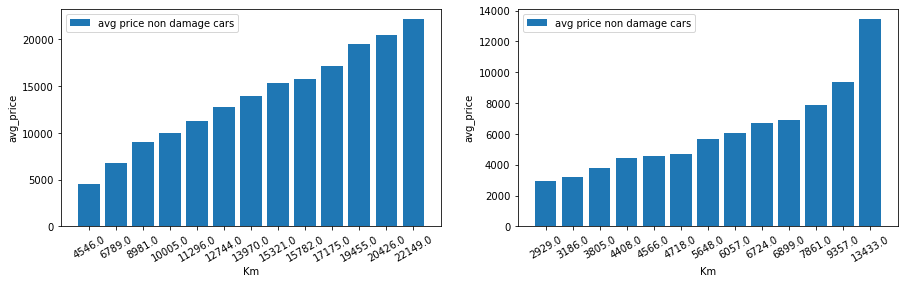

In [117]:
plt.figure(figsize = (15,4))

plt.subplot(1,2,1)

data_nodamage_1 = range(len(sort_avg_price_by_km_non_damage))
data_nodamage_2 = list(sort_avg_price_by_km_non_damage.values())

plt.bar(data_nodamage_1,data_nodamage_2,label="avg price non damage cars")
plt.legend()

plt.xticks(data_nodamage_1, data_nodamage_2,rotation=30)
plt.xlabel("Km")
plt.ylabel("avg_price")

plt.subplot(1,2,2)


data_damage_1 = range(len(sort_avg_price_by_km_damage))
data_damage_2 = list(sort_avg_price_by_km_damage.values())

plt.bar(data_damage_1,data_damage_2,label="avg price non damage cars")
plt.legend()

plt.xticks(data_damage_1, data_damage_2,rotation=30)
plt.xlabel("Km")
plt.ylabel("avg_price")
plt.show()

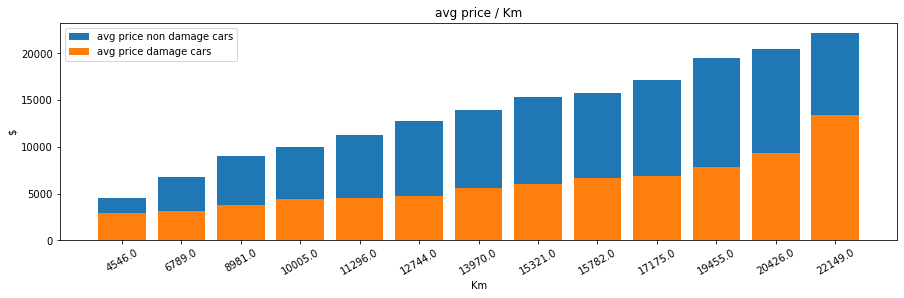

In [118]:
plt.figure(figsize = (15,4))

plt.title('avg price / Km')

plt.bar(data_nodamage_1,data_nodamage_2,label="avg price non damage cars")

plt.bar(data_damage_1,data_damage_2,label="avg price damage cars")
plt.xticks(data_nodamage_1,data_nodamage_2,rotation=30)
plt.legend()
plt.xlabel("Km")
plt.ylabel("$")

plt.show()

In [119]:
series_nondamage = pd.Series(avg_price_by_km_non_damage) 
df_nondamage = pd.DataFrame(series_nondamage)
df_nondamage = df_nondamage.rename(columns = {0:'price_not_damage'})

series_damage = pd.Series(avg_price_by_km_damage)
df_damage = pd.DataFrame(series_damage)
df_damage = df_damage.rename(columns = {0:'price_damage'})

series_diference = series_nondamage - series_damage
df_diference = pd.DataFrame(series_diference)
df_diference = df_diference.rename(columns = {0:'price_difference'})

series_diference_percent = (series_damage * 100) / series_nondamage.round(2)
df_diference_percent = pd.DataFrame(series_diference_percent)
df_diference_percent = df_diference_percent.rename(columns = {0:'%_damage_vs_notdamage '})


df = pd.concat([df_nondamage, df_damage, df_diference, df_diference_percent], axis = 1)
df

,price_not_damage,price_damage,price_difference,%_damage_vs_notdamage
150000,4546.0,2929.0,1617.0,64.430268
125000,6789.0,3805.0,2984.0,56.046546
100000,13970.0,4718.0,9252.0,33.772369
90000,8981.0,4408.0,4573.0,49.081394
80000,10005.0,6057.0,3948.0,60.539730
70000,11296.0,5648.0,5648.0,50.000000
60000,12744.0,7861.0,4883.0,61.683930
50000,15321.0,9357.0,5964.0,61.073037
40000,15782.0,13433.0,2349.0,85.115955
30000,17175.0,6899.0,10276.0,40.168850


In [120]:
df.index

Int64Index([150000, 125000, 100000,  90000,  80000,  70000,  60000,  50000,
             40000,  30000,  20000,   5000,  10000],
           dtype='int64')

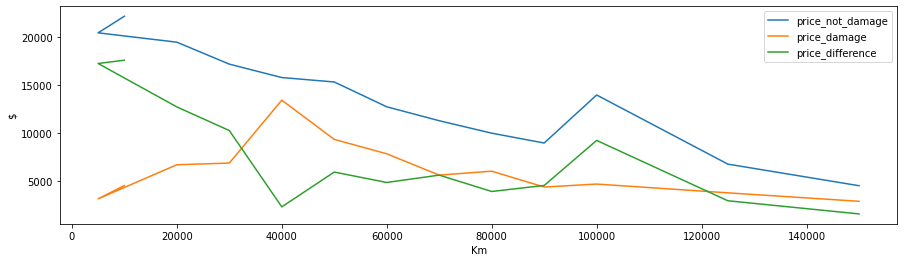

In [121]:
plt.figure(figsize = (15,4))

plt.plot(series_nondamage,label="price_not_damage")
plt.plot(series_damage,label="price_damage")
plt.plot(series_diference,label="price_difference")

plt.xlabel("Km")
plt.ylabel("$")
plt.legend()

plt.show()

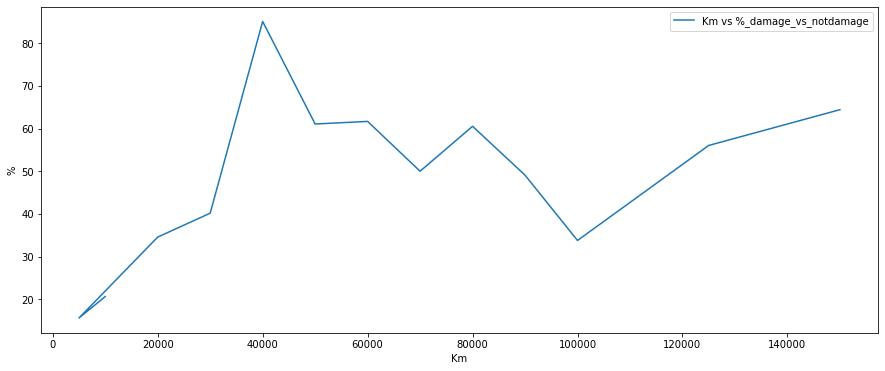

In [122]:
plt.figure(figsize = (15,6))
plt.plot(df_diference_percent,label="Km vs %_damage_vs_notdamage")

plt.xlabel("Km")
plt.ylabel("%")

plt.legend()
plt.show()

## 8. Conclusions

The conclusions we can draw from our study are several:

 1. The 75% of the vehicles for sale have an average mileage of about 150,000 km and if we count the vehicles with a minimum selling price of 850 we have that 75% of the total have an average price of 8750.

 2. Once we have corrected the values we have that our 75% of the vehicles were registered in 2008 and that most of the registrations were between the period 2002 / 2007.

 3. The most offered vehicle brand is Volkswagen.

 4. The highest average price belongs to Audi, then Mercedes and finally to BMW. 

 5. The average number of kilometers per brand is led by BMW followed by Mercedes and Audi.

 6. most of the vehicles are sedan type and are gasoline cars followed by diesel and lpg cars.


Taking into account the order of average price per vehicle brand 
we know that the most repeated per model is:

   - Audi with A4 followed by the A3 and A6.

   - Mercedes the  C Class followed E Class and the A Class.

   - BMW with the 3 Series, the 5 Series in second place and the 1 Series in third place .
   

Finally we can see the differences between the price kilometer of the damaged and non-damaged cars and we observe that the biggest difference in price is given in vehicles with 40000 Kilometers 150000Km and 60000Km.